In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [3]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [20]:
train_generator = datagen.flow_from_directory(
    directory=r"./images/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=31,
    class_mode="categorical",
    shuffle=True,
    subset="training",
    seed=69
)

Found 465 images belonging to 15 classes.


In [21]:
valid_generator = datagen.flow_from_directory(
    directory=r"./images/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=31,
    class_mode="categorical",
    shuffle=True,
    subset="validation",
    seed=69
)

Found 111 images belonging to 15 classes.


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


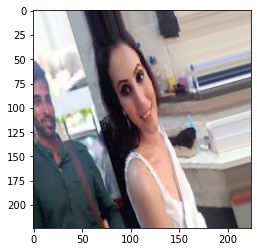

In [13]:
from matplotlib import pyplot as plt
x_batch, y_batch = next(train_generator)
for i in range (1):
    print(y_batch[i])
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


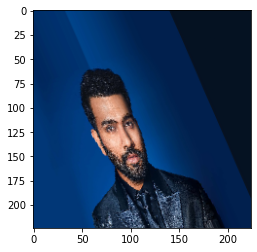

In [14]:
from matplotlib import pyplot as plt
x_batch, y_batch = next(valid_generator)
for i in range (1):
    print(y_batch[i])
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [12]:
import keras
base_model = keras.applications.MobileNetV2(weights="imagenet",include_top=False,input_shape=(224,224,3))
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(15, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False

In [29]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

model = VGG16(include_top=False, input_shape=(224, 224, 3),weights='imagenet')

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(500, activation='relu')(flat1)
output = Dense(15, activation='softmax')(class1)

model = Model(inputs=model.inputs, outputs=output)


model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [31]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,validation_data = valid_generator,epochs=100, verbose=1)

Epoch 1/100
 1/15 [=>............................] - ETA: 0s - loss: 2.9718 - accuracy: 0.0000e+00

In [ ]:
model.save('cricketers')

In [2]:
from tensorflow import keras
model = keras.models.load_model('./cricketers/')

In [3]:
from keras_preprocessing import image
from matplotlib import pyplot as plt

def pred(path):
    img = image.load_img(path, target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x=x/255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    players = ['bhuvneshwar_kumar','dinesh_karthik','hardik_pandya','jasprit_bumrah','k._l._rahul','kedar_jadhav','kuldeep_yadav','mohammed_shami','ms_dhoni','ravindra_jadeja','rohit_sharma','shikhar_dhawan','vijay_shankar','virat_kohli','yuzvendra_chahal']
    print(players[list(classes[0]).index(max(list(classes[0])))])
    
def pred2(img):
#     plt.imshow(img)
#     plt.show()
    x = image.img_to_array(img)
    x=x/255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images)
    players = ['bhuvneshwar_kumar','dinesh_karthik','hardik_pandya','jasprit_bumrah','k._l._rahul','kedar_jadhav','kuldeep_yadav','mohammed_shami','ms_dhoni','ravindra_jadeja','rohit_sharma','shikhar_dhawan','vijay_shankar','virat_kohli','yuzvendra_chahal']
#     print(players[list(classes[0]).index(max(list(classes[0])))])
    return players[list(classes[0]).index(max(list(classes[0])))]

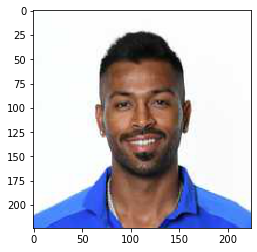

shikhar_dhawan


In [16]:
pred('./mc.jpg')

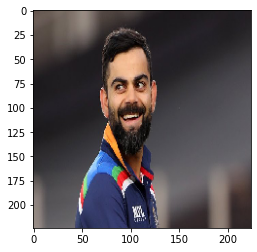

ms_dhoni


In [17]:
pred('./virat.jpg')

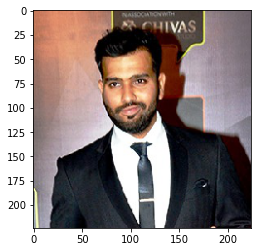

hardik_pandya


In [18]:
pred('./rohit.jpg')

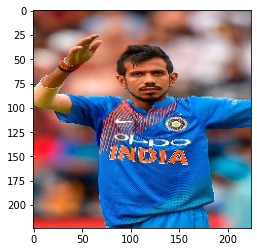

yuzvendra_chahal


In [19]:
pred('./yuzi.jpeg')

In [4]:
import cv2

camera = cv2.VideoCapture(1)

while True:
    success, img = camera.read()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier('haarcascade.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    img2 = img.copy()
    
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        img2 = img2[y-70:y+h+70, x-70:x+w+70]

    img2 = cv2.resize(img2,(224,244))
    img2rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
    txt = pred2(img2rgb)
    cv2.putText(img, txt,(30,30),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2, cv2.LINE_AA)
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == ord('t'):
        cv2.destroyAllWindows()
        camera.release()
        break